In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from plots import *

# Information Theory

Information theory is concerned with representing data in a compact fashion (a task known as **data compression** or **source coding**), as well as with transmitting and storing it in a way that is robust to errors (a task known as **error correction** or **channel coding**)

## Entropy
The **entropy** of a random variable $X$ with distribution $p$, denoted by $\mathbb{H}(X)$ or sometimes $\mathbb{H}(p)$, is a measure of its uncertainty. In particular, for a discrete variable with $K$ states, it is defined by 

$$
\mathbb{H}(X)\triangleq - \sum_{k=1}^Kp(X=k)\log_2 p(X=k)
$$

For the special case of binary random variables, $X\in\{0, 1\}$, we can write $p(X=1) = \theta$ and $p(X=0) = 1-\theta$. Hence the entropy becomes

$$
\mathbb{H}(X) = -[\theta\log_2\theta + (1-\theta)\log_2(1-\theta)]
$$

This is called the **binary entropy function**, and is also written $\mathbb{H}(\theta)$. We see that the maximum value of 1 occurs when the distribution is uniform, $\theta = 0.5$.

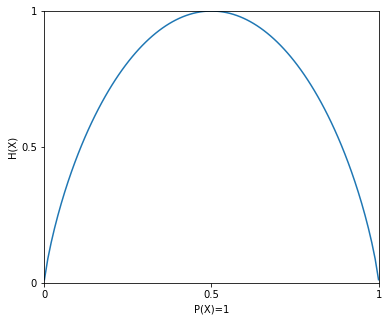

In [9]:
bernoulli_entropy_fig()

## KL divergence

One way to measure the dissimilarity of two probability distributions $p$ and $q$ is known as the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. This is defined as follows:

$$
\mathbb{KL}(p||q)\triangleq\sum_{k=1}^K p_k\log \frac{p_k}{q_k}
$$

where the sum gets replaced by an integral for pdfs. Note that the KL divergence is **not** a distance, since it is asymmetric, i.e. $\mathbb{KL}(p||q) \ne \mathbb{KL}(q||p)$.

We can rewrite this as

$$
\mathbb{KL}(p||q) = \sum_k p_k\log p_k -\sum_k p_k\log q_k = \mathbb{H}(p) + \mathbb{H}(p, q)
$$

where $\mathbb{H}(p, q)$ is called the **cross entropy**,

$$
\mathbb{H}(p, q)\triangleq -\sum_k p_k\log q_k
$$

One can show that the KL divergence is the average number of *extra* bits needed to encode the data, due to the fact that we used distribution $q$ to encode the data instead of the true distribution $p$. 

**Important:** $\mathbb{KL}(p ||q) \ge 0$, and that the KL is only equal to zero iff $q = p$.

## Mutual Information

Consider two random variables $X$ and $Y$. Suppose we want to know how much knowing one variable tells us about the other. A general approach is to determine how similar the joint distribution $p(X, Y)$ is to the factored distribution $p(X)p(Y)$. This is called the **mutual information** or **MI** and is defined as follows:

$$
\mathbb{I}(X, Y) \triangleq \mathbb{KL}(p(X, Y) || p(X)p(Y)) = \sum_x\sum_y p(x, y)\log\frac{p(x, y)}{p(x)p(y)}
$$
We have $\mathbb{I}(X, Y) \ge 0$ with equality iff $p(X, Y) = p(X)p(Y)$. That is the MI is zero iff the variables are independent.

For continuous random variables, we use the **maximal information coefficient** (MIC), defined as follows:

$$
m(x, y) = \frac{\max_{G\in G(x, y)}\mathbb{I}(X{G}; Y(G))}{\log\min(x, y)}
$$

where $G(x, y)$ is the set of 2d grids of size $x\times y$, and $X(G)$, $Y(G)$ represents a discretization of the variables onto this grid. Now define MIC as

$$
\mathrm{MIC}\triangleq \max_{x, y:xy < B} m(x, y)
$$

where $B$ is some sample-size dependent bound on the number of bins we can use and still reliably estimate the distribution.

Statistics such as MIC based on mutual information can be used to discover interesting relationships between variables in a way that simpler measures, such as correlation coefficients, cannot.